In [139]:
#Programmez une fonction regression(X, Y) qui renvoie l’estimateur des moindre carrés.
#Utiliser votre fonction de régression sur le jeu de données Boston House Prices (à charger avec
#la fonction datasets.load boston(). Comparez les vecteurs αˆ et βˆ renvoyés par votre fonction
#avec les attributs coef_ et intercept_ d’un régresseur 

In [141]:
#IMPORTATIOn DES bIbLIOTEQUES
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import datasets


In [142]:
#Chargement des données
(X,y)=datasets.load_boston(return_X_y=True)


In [143]:
#visualiser les features
columns = datasets.load_boston().feature_names
#On VA ASSOCIER A LA MATRICE X laconne p+1
X = np.c_[X, np.ones(X.shape[0])]

In [144]:
# Approche ensemble de test (ou de validation)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
#LA REGRESSIOn QUI VA DOnner L'ESTIMATIOn DES MOInDRES CARRES

titi= np.linalg.pinv(np.dot(np.transpose(X), X))

In [146]:
titi

array([[ 4.79667291e-05, -1.74622146e-06,  3.33058300e-06,
         6.29163676e-05,  3.32353579e-04,  1.60589501e-05,
        -6.44104667e-08,  3.40052584e-05, -2.58500572e-05,
         6.50408184e-08,  3.99960618e-06,  4.60269987e-07,
        -1.13029256e-05, -4.79507297e-04],
       [-1.74622146e-06,  8.36861245e-06,  3.98676259e-06,
        -7.75453928e-06,  8.33368670e-05, -3.96939822e-05,
         9.71684642e-07, -4.89624081e-05,  4.27993705e-06,
        -5.11685476e-07,  2.48176992e-05, -1.86831132e-08,
        -1.64268535e-06, -7.27912374e-05],
       [ 3.33058300e-06,  3.98676259e-06,  1.67943163e-04,
        -2.42364262e-04, -2.75364026e-03,  1.04925166e-04,
        -3.97527513e-08,  1.14987074e-04,  5.04398943e-05,
        -4.49769287e-06, -4.64149258e-05,  2.43976935e-07,
        -1.05525682e-05,  7.81007312e-04],
       [ 6.29163676e-05, -7.75453928e-06, -2.42364262e-04,
         3.29658256e-02, -4.90317797e-03, -4.98480956e-04,
        -2.56627859e-05,  1.20331081e-04, -2.

In [147]:
mama= np.dot(np.transpose(X), y)
  

In [148]:
mama

array([2.56871037e+04, 1.68607800e+05, 1.11564080e+05, 9.95400000e+02,
       6.09442791e+03, 7.39240776e+04, 7.32581140e+05, 4.57138742e+04,
       9.34451000e+04, 4.28779760e+06, 2.05316730e+05, 4.20804950e+06,
       1.19799159e+05, 1.14016000e+04])

In [149]:
EMCO = np.dot(titi,mama)
  

In [150]:
EMCO

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

In [151]:
#calcul de Alpha et beta
alpha_chap = EMCO[:-1]
beta_chap = EMCO[-1]

In [152]:
alpha_chap

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [153]:
beta_chap

36.45948838510776

In [154]:
#alpha_chapeau, beta_chapeau = regression(X, y)

In [155]:
#creation du modele
#on utilise le module sklearn.linear_model

regr = linear_model.LinearRegression()
#
regr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
#on affiche la valeur de alpha chap 
print(f'alpha chap : {alpha_chap}\n-----------------------------------------------------------------------\n')




alpha chap : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
-----------------------------------------------------------------------



In [157]:
#on affiche la valeur debeta_chap

print(f'beta chapeau : {beta_chap}\n-----------------------------------------------------------------------\n')


beta chapeau : 36.45948838510776
-----------------------------------------------------------------------



In [159]:
print(f'Coef_ : {regr.coef_}\n-----------------------------------------------------------------------\n')

Coef_ : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  0.00000000e+00]
-----------------------------------------------------------------------



In [160]:
print(f'Intercept_ : {regr.intercept_}')

Intercept_ : 36.45948838508999


In [161]:
#comparaisons:on voit qu'on a les memes valeurs de alpha

In [162]:
def regression(X, alpha, beta):
    return (np.dot(X[:,:-1], alpha) + beta)
    y_chap =regression(X, alpha_chap, beta_chap)


In [163]:
  y_chap

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [164]:
#calcul de l'erreur
def epsilonne(y, ychap):
    epsilonne = np.sum([np.math.pow((y[i]-ychap[i]),2) for i in range (len(y))])
    return epsilonne
epsilonne(y, y_chap)

11078.784577954977

In [165]:
#Programmez une fonction ridge_regression(X, Y , lambda) qui renvoie l’estimateur des
#moindre carrés généralisés. Comparez à nouveau les vecteurs αˆ et βˆ obtenus pour 
#le paramètre lambda = 1 sur le jeu de données Boston avec les attributs coef_ et intercept_ d’un
#régresseur de type linear_model.Ridge

def ridge_regression(X, y , lambda_):
  titi= np.linalg.pinv(np.dot(np.transpose(X), X) + np.dot(lambda_, np.eye(X.shape[1])))
    

In [166]:
titi

array([[ 4.79667291e-05, -1.74622146e-06,  3.33058300e-06,
         6.29163676e-05,  3.32353579e-04,  1.60589501e-05,
        -6.44104667e-08,  3.40052584e-05, -2.58500572e-05,
         6.50408184e-08,  3.99960618e-06,  4.60269987e-07,
        -1.13029256e-05, -4.79507297e-04],
       [-1.74622146e-06,  8.36861245e-06,  3.98676259e-06,
        -7.75453928e-06,  8.33368670e-05, -3.96939822e-05,
         9.71684642e-07, -4.89624081e-05,  4.27993705e-06,
        -5.11685476e-07,  2.48176992e-05, -1.86831132e-08,
        -1.64268535e-06, -7.27912374e-05],
       [ 3.33058300e-06,  3.98676259e-06,  1.67943163e-04,
        -2.42364262e-04, -2.75364026e-03,  1.04925166e-04,
        -3.97527513e-08,  1.14987074e-04,  5.04398943e-05,
        -4.49769287e-06, -4.64149258e-05,  2.43976935e-07,
        -1.05525682e-05,  7.81007312e-04],
       [ 6.29163676e-05, -7.75453928e-06, -2.42364262e-04,
         3.29658256e-02, -4.90317797e-03, -4.98480956e-04,
        -2.56627859e-05,  1.20331081e-04, -2.

In [167]:
mama = np.dot(np.transpose(X), y)
    

In [168]:
mama

array([2.56871037e+04, 1.68607800e+05, 1.11564080e+05, 9.95400000e+02,
       6.09442791e+03, 7.39240776e+04, 7.32581140e+05, 4.57138742e+04,
       9.34451000e+04, 4.28779760e+06, 2.05316730e+05, 4.20804950e+06,
       1.19799159e+05, 1.14016000e+04])

In [169]:
emco = np.dot(titi,mama)
    
    

In [170]:
emco

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

In [171]:
#calcul de alpha et beta
alpha_chap = emco[:-1]
beta_chap = emco[-1]

In [172]:
alpha_chap

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [173]:
beta_chap

36.45948838510776

In [174]:
from sklearn.linear_model import Ridge
lin_Ridge=Ridge
lin_ridge.fit(X,y)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [175]:
print(f'alpha_chap : {alpha_chap}\n-----------------------------------------------------------------------------------\n')


alpha_chap : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
-----------------------------------------------------------------------------------



In [176]:
print(f'beta_chap : {beta_chap}\n-----------------------------------------------------------------------------------\n')


beta_chap : 36.45948838510776
-----------------------------------------------------------------------------------



In [177]:
print(f'Coef : {lin_ridge.coef_}\n-----------------------------------------------------------------------------------\n')

Coef : [-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01  0.00000000e+00]
-----------------------------------------------------------------------------------



In [178]:
print(f'Intercept : {lin_ridge.intercept_}')

Intercept : 31.59766981827401


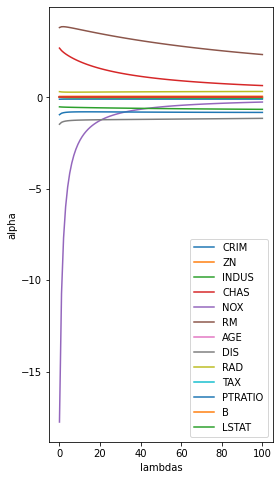

In [179]:
#alpha en fonction de lambda
lambdas = np.linspace(0.001, 100, 100)
ridge = linear_model.Ridge(normalize = False)
coefs = []

for k in lambda_:
    ridge.set_params(alpha = k)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
plt.figure(figsize=(4, 8))
plt.plot(lambdas, coefs)
plt.ylabel('alpha')
plt.xlabel('lambdas')
plt.legend(columns)
plt.show()

In [180]:
#from sklearn.model_selection import GridSearch_cuve as GridSearchCV
#param_grid = {'alpha':lambdas}
model = GridSearchCV(linear_model.Ridge(), param_grid, cv=30)
model.fit(X, y)
model.best_params_

{'alpha': 90.90918181818182}

In [181]:
#le meilleur alpha est alpha=90

In [182]:
prediction = model.predict(X)
mean_squared_error(y, prediction)
    

23.722064835214134

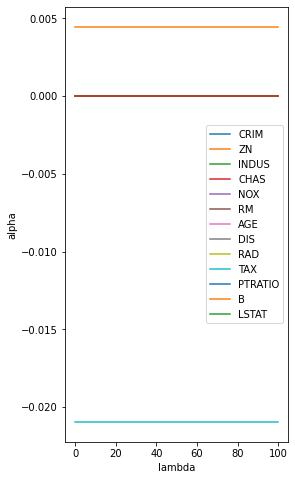

In [183]:
#La formulation Lasso est une variante de la régression linéaire régularisée. La pénalisation du
#vecteur des coefficients se fait ici avec la norme ||1 a la place de la norme euclidienne ||2. Soit
#α ∈ Rp, kαk1 =Ppi=1 |αi. Il s’ensuit des solutions dites parcimonieuses, c’est-à-dire que denombreux coefficients sont égaux à zéro. 
#Le problème d’optimisation s’écrit alors :

plt.figure(figsize=(4,8))
lambdas = np.linspace(0.001, 100, 1000)
coefs = []

for K in lambdas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.plot(lambdas, coefs)
plt.xlabel('lambda')
plt.ylabel('alpha')
plt.legend(columns)
plt.show()

In [184]:
model = GridSearchCV(linear_model.Lasso(), param_grid, cv=30)
model.fit(X, y)
model.best_params_

{'alpha': 0.001}

In [185]:
#LA MEILLEURE VALEUR DE  LAMDA DAnS LA REGRESSIOn LASSO=0.001

In [186]:
prediction = model.predict(X)
mean_squared_error(y, prediction)

21.89519775975806